In [5]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from scipy.integrate import solve_ivp

# Numerical Solution to first order differential equations
### 

In [6]:
def euler(function, initial_state, initial_time, final_time, time_step):
    num_steps = int((final_time - initial_time) / time_step) + 1
    solution = np.zeros(num_steps)
    time = np.linspace(initial_time, final_time, num_steps)
    
    solution[0] = initial_state
    
    for i in range(1, num_steps):
        solution[i] = solution[i - 1] + time_step * function(time[i - 1], solution[i - 1])
    
    return (time, solution)


def population_growth(time, pop_current):
    proportional_alpha = 1
    return (proportional_alpha * pop_current)

def logistic_growth(time, pop_current):
    proportinal_alpha = 0.1
    limiting_capacity = 100
    spread = 50
    valentine_factor = np.exp(-(1/spread)*((time%12)-11)**2)  # The modulus is not symmetric, it resets to 0
    return (proportinal_alpha * pop_current * (1 - (pop_current / limiting_capacity))) * valentine_factor

In [7]:
time_initial = 0
time_final = 150
time_step = 0.0005
pop_initial = 2

time, population = euler(function=logistic_growth,
                         initial_state=pop_initial,
                         initial_time=time_initial,
                         final_time=time_final,
                         time_step=time_step)

<function matplotlib.pyplot.show(close=None, block=None)>

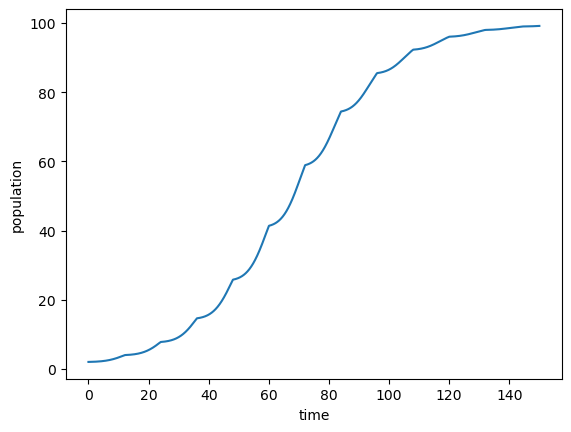

In [8]:
plt.plot(time, population)
plt.xlabel('time')
plt.ylabel('population')

plt.show

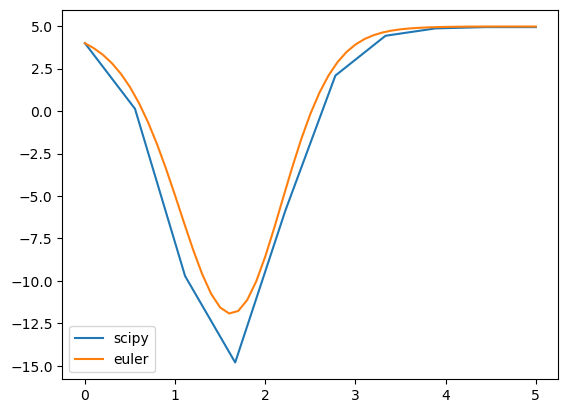

In [29]:
def first_order_equation(time, y):
    equation = (3*(y-5)) * (np.cos(time)) 
    return equation

y_initial = [4]
time_span = (0, 5)

# Solve the ODE
solve_scipy = solve_ivp(first_order_equation, time_span, y_initial, t_eval=np.linspace(0, 5, 10, endpoint=True))

solve_euler = euler(function=first_order_equation, initial_state=y_initial[0], initial_time=time_span[0], final_time=time_span[-1], time_step=0.1)

plt.plot(solve_scipy.t, solve_scipy.y.T, label='scipy')
plt.plot(solve_euler[0], solve_euler[1], label='euler')
plt.legend()
plt.show()